##### Linear Regresssion Example

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [4]:
data = pd.read_csv('data/wine.csv')
data.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [5]:
# print the shape of the DataFrame
data.shape

(25, 7)

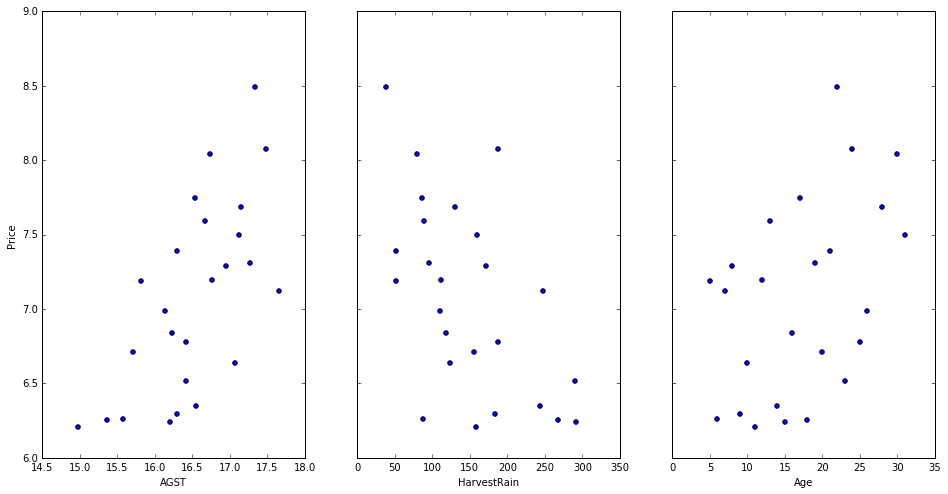

In [7]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Year', y='Price', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='WinterRain', y='Price', ax=axs[1])
data.plot(kind='scatter', x='AGST', y='Price', ax=axs[2])

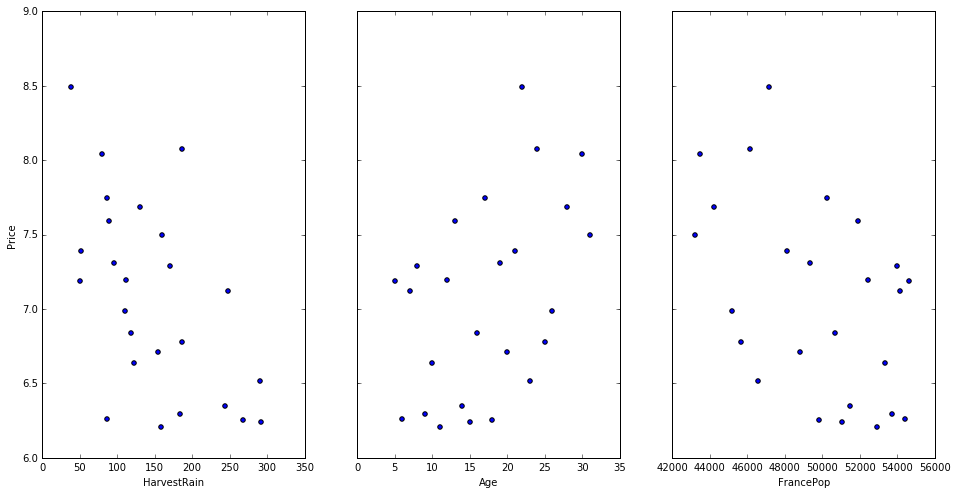

In [8]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='HarvestRain', y='Price', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Age', y='Price', ax=axs[1])
data.plot(kind='scatter', x='FrancePop', y='Price', ax=axs[2])

In [14]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Price ~ Year + WinterRain + AGST + HarvestRain + Age + FrancePop', 
             data=data).fit()

# print the coefficients
lm.params

Intercept      6.580350e-08
Year          -2.271301e-04
WinterRain     1.042507e-03
AGST           6.012239e-01
HarvestRain   -3.958125e-03
Age            3.576184e-04
FrancePop     -4.952730e-05
dtype: float64

In [15]:
lm.rsquared

0.82935922232990378

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Sat, 11 Jun 2016   Prob (F-statistic):           1.04e-06
Time:                        10:25:26   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     6.58e-08   3.48e-05      0.002      0.999     -7.28e-05  7.29e-05
Year           -0.0002      0.005     -0.044      0.965        -0.011     0.011
WinterRain      0.0010      0.001      1.963      0.064     -6.89e-05     0.002
AGST            0.6012      0.103      5.836      0.000         0.386     0.817
HarvestRain    -0.0040      0.001     -4.523      0.000        -0.006    -0.002
Age             0.0004      0.074      0.005      0.996        -0.155     0.155
FrancePop   -4.953e-05      0.000     -0.297      0.770        -0.000     0.000
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   2.792
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.026
Skew:                          -0.005   Prob(JB):                        0.599
Kurtosis:                       2.008   Cond. No.                     3.23e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.95e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
# Create model using a smaller amount of significant variables
lm = smf.ols(formula='Price ~ AGST + HarvestRain + WinterRain + Age', 
             data=data).fit()

In [20]:
lm.rsquared

0.82856621934242813

#### In-sample prediction

In [28]:
ypred = lm.predict(data)
ypred

array([ 7.71515356,  7.87293687,  7.67732765,  7.00335549,  7.01993151,
        7.53932616,  6.75766829,  8.363191  ,  7.51318707,  6.63028304,
        7.56029312,  5.91863325,  7.55530516,  7.10919438,  6.26214399,
        6.60372738,  7.31679442,  7.18587836,  5.88022723,  7.0882792 ,
        6.56948742,  6.9897216 ,  6.9233729 ,  6.71339661,  6.91178436])

In [24]:
wine_test = pd.read_csv('data/wine_test.csv')

In [27]:
lm.predict(wine_test)

array([ 6.76892463,  6.6849104 ])